In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/databases/assignment9.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#removendo o ID
df = df.drop('CUST_ID',axis=1)

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#checando nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
#preenchendo nulos
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].min(), inplace=True)

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].min(), inplace=True)

In [ ]:
#conferindo nulos novamente se foram removidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
#criando filtros de cada uma das colunas definidas abaixo dos 95%
from numpy import percentile
colunas = ['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']
filtros = {}
for col in colunas:
  filtros[col] = percentile(df[col],95)

In [ ]:
print(filtros)

{'BALANCE': 5909.111807849996, 'PURCHASES': 3998.619499999998, 'MINIMUM_PAYMENTS': 2719.5669347999956, 'PAYMENTS': 6082.090595249998, 'CREDIT_LIMIT': 12000.0, 'PURCHASES_TRX': 57.0, 'ONEOFF_PURCHASES': 2671.0939999999937, 'CASH_ADVANCE': 4647.169121999989, 'CASH_ADVANCE_TRX': 15.0}


In [ ]:
##Fazendo o filtro com as colunas e valores baseado no dicionario criado
for k,v in filtros.items():
  if k=='BALANCE':
    df_sem_outlier = df.loc[df[k] < v]
  else:
    df_sem_outlier = df_sem_outlier.loc[df_sem_outlier[k]< v]

In [ ]:
#Fazendo teste para verificar se o df_sem_outlier realmente removeu os outliers
teste = df_sem_outlier.loc[df_sem_outlier['BALANCE'] > 5909.1118]
teste.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Exploratory Data Analisys

In [ ]:
df_sem_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6880 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6880 non-null   float64
 1   BALANCE_FREQUENCY                 6880 non-null   float64
 2   PURCHASES                         6880 non-null   float64
 3   ONEOFF_PURCHASES                  6880 non-null   float64
 4   INSTALLMENTS_PURCHASES            6880 non-null   float64
 5   CASH_ADVANCE                      6880 non-null   float64
 6   PURCHASES_FREQUENCY               6880 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6880 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6880 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6880 non-null   float64
 10  CASH_ADVANCE_TRX                  6880 non-null   int64  
 11  PURCHASES_TRX                     6880 non-null   int64  
 12  CREDIT

In [ ]:
df_sem_outlier.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,995.151694,0.857780,579.426174,300.337948,279.366419,500.025960,0.469246,0.162995,0.346478,0.100031,1.823547,9.750872,3456.202556,974.664002,410.897522,0.153512,11.468750
std,1190.965770,0.252570,721.139243,517.630795,452.429074,902.031092,0.391970,0.261136,0.386524,0.152807,2.995315,11.296587,2465.720075,974.757099,443.575376,0.290509,1.404998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,75.973734,0.818182,41.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,320.166113,145.768171,0.000000,12.000000
50%,547.868765,1.000000,308.190000,0.000000,76.430000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2700.000000,651.613201,218.279833,0.000000,12.000000
75%,1462.396758,1.000000,832.010000,395.012500,387.702500,650.349033,0.916667,0.250000,0.750000,0.166667,3.000000,13.000000,5000.000000,1298.660032,531.724151,0.166667,12.000000
max,5906.184924,1.000000,3986.240000,2655.990000,3927.120000,4639.195255,1.000000,1.000000,1.000000,1.166667,14.000000,56.000000,11500.000000,6043.227704,2707.521979,1.000000,12.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


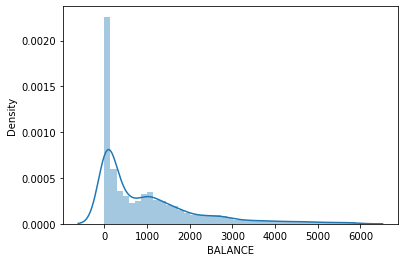

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


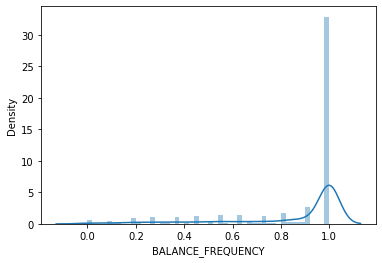

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


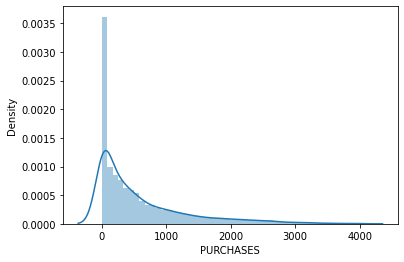

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


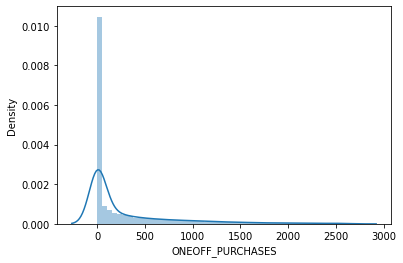

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


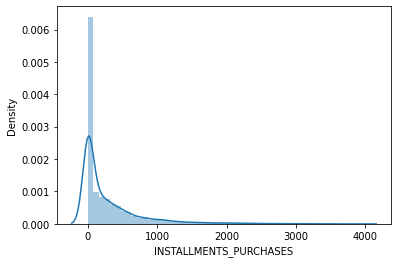

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


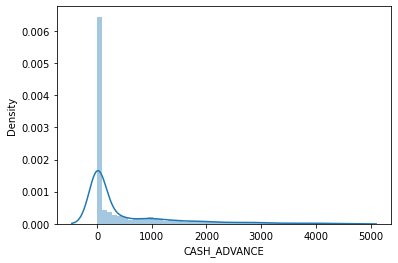

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


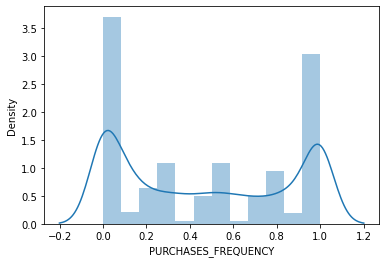

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


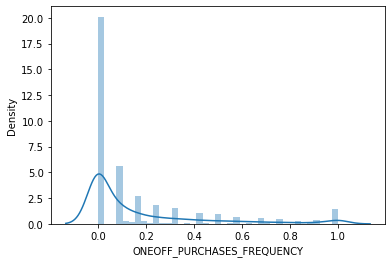

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


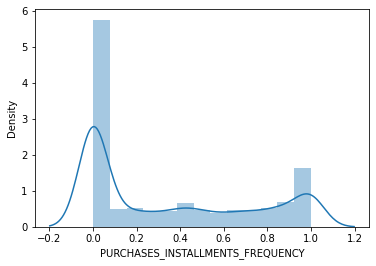

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


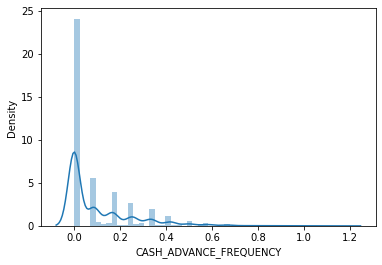

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


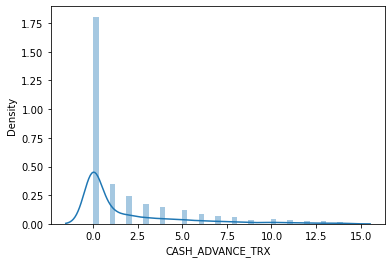

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


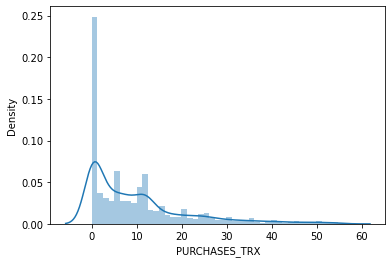

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


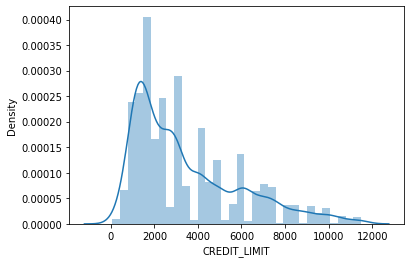

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


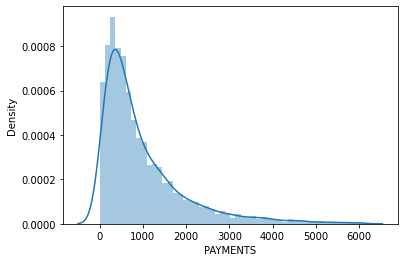

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


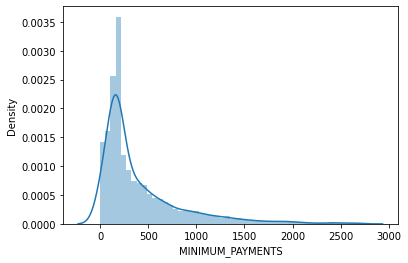

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


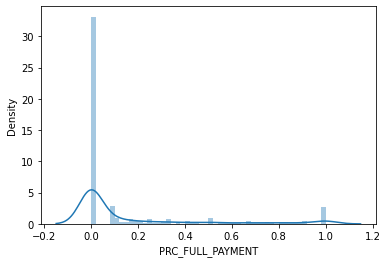

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


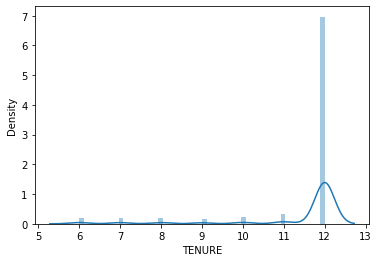

In [ ]:
for x in df_sem_outlier.columns:
  sns.distplot(df_sem_outlier[x])
  plt.show()

In [ ]:
df_sem_outlier.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.388826,-0.007290,0.072278,-0.094595,0.459594,-0.182036,0.041315,-0.186105,0.428666,0.412020,-0.045442,0.309333,0.197313,0.765386,-0.379686,0.077786
BALANCE_FREQUENCY,0.388826,1.000000,0.171998,0.124224,0.131848,0.099699,0.215398,0.180001,0.155809,0.186478,0.168668,0.221288,0.060159,0.105672,0.353868,-0.097666,0.110221
PURCHASES,-0.007290,0.171998,1.000000,0.781361,0.699773,-0.182171,0.570786,0.552257,0.428318,-0.218938,-0.202261,0.723931,0.262339,0.409433,0.036349,0.192959,0.096090
ONEOFF_PURCHASES,0.072278,0.124224,0.781361,1.000000,0.101104,-0.105571,0.286113,0.711857,0.015761,-0.114954,-0.106277,0.480346,0.248516,0.324142,0.035139,0.033380,0.060932
INSTALLMENTS_PURCHASES,-0.094595,0.131848,0.699773,0.101104,1.000000,-0.169871,0.582695,0.065634,0.665018,-0.217587,-0.200969,0.604707,0.133706,0.281426,0.017687,0.269147,0.083432
CASH_ADVANCE,0.459594,0.099699,-0.182171,-0.105571,-0.169871,1.000000,-0.316043,-0.123215,-0.263289,0.650074,0.686583,-0.212899,0.121316,0.264081,0.304830,-0.216723,-0.125570
PURCHASES_FREQUENCY,-0.182036,0.215398,0.570786,0.286113,0.582695,-0.316043,1.000000,0.414880,0.864782,-0.352411,-0.324774,0.766430,0.096371,0.096936,-0.051501,0.318934,0.034621
ONEOFF_PURCHASES_FREQUENCY,0.041315,0.180001,0.552257,0.711857,0.065634,-0.123215,0.414880,1.000000,0.002268,-0.113212,-0.107844,0.525981,0.249811,0.219112,0.019057,0.072393,0.058180
PURCHASES_INSTALLMENTS_FREQUENCY,-0.186105,0.155809,0.428318,0.015761,0.665018,-0.263289,0.864782,0.002268,1.000000,-0.299644,-0.274294,0.671567,0.019510,0.053636,-0.050847,0.286551,0.046617
CASH_ADVANCE_FREQUENCY,0.428666,0.186478,-0.218938,-0.114954,-0.217587,0.650074,-0.352411,-0.113212,-0.299644,1.000000,0.894974,-0.226198,-0.015922,0.129214,0.288909,-0.260116,-0.161098


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sem_outlier)
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03,6.880000e+03
mean,1.316776e-16,3.502447e-15,2.193013e-17,3.112142e-15,1.810890e-16,1.469521e-15,-6.675055e-16,7.624134e-15,4.681010e-16,-2.726501e-16,-5.398500e-16,5.325198e-18,-3.875292e-16,-4.619044e-16,-5.721199e-16,-4.058430e-15,4.187477e-15
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-8.356445e-01,-3.396453e+00,-8.035456e-01,-5.802587e-01,-6.175260e-01,-5.543737e-01,-1.197235e+00,-6.242230e-01,-8.964594e-01,-6.546679e-01,-6.088438e-01,-8.632325e-01,-1.381523e+00,-9.999772e-01,-9.263549e-01,-5.284608e-01,-3.892637e+00
25%,-7.718482e-01,-1.567914e-01,-7.461323e-01,-5.802587e-01,-6.175260e-01,-5.543737e-01,-9.846190e-01,-6.242230e-01,-8.964594e-01,-6.546679e-01,-6.088438e-01,-7.747037e-01,-7.934172e-01,-6.714960e-01,-5.977532e-01,-5.284608e-01,3.781419e-01
50%,-3.755905e-01,5.631326e-01,-3.761491e-01,-5.802587e-01,-4.485812e-01,-5.543737e-01,-1.341498e-01,-6.242230e-01,-4.652339e-01,-6.546679e-01,-6.088438e-01,-3.320600e-01,-3.067086e-01,-3.314408e-01,-4.342705e-01,-5.284608e-01,3.781419e-01
75%,3.923530e-01,5.631326e-01,3.502821e-01,1.829131e-01,2.394717e-01,1.666617e-01,1.141552e+00,3.332007e-01,1.044052e+00,4.361129e-01,3.927931e-01,2.876412e-01,6.261496e-01,3.324106e-01,2.724123e-01,4.528708e-02,3.781419e-01
max,4.123872e+00,5.631326e-01,4.724554e+00,4.551165e+00,8.063184e+00,4.589055e+00,1.354168e+00,3.205472e+00,1.690889e+00,6.980785e+00,4.065462e+00,4.094377e+00,3.262488e+00,5.200200e+00,5.177906e+00,2.914020e+00,3.781419e-01


Text(0, 0.5, 'Inertia')

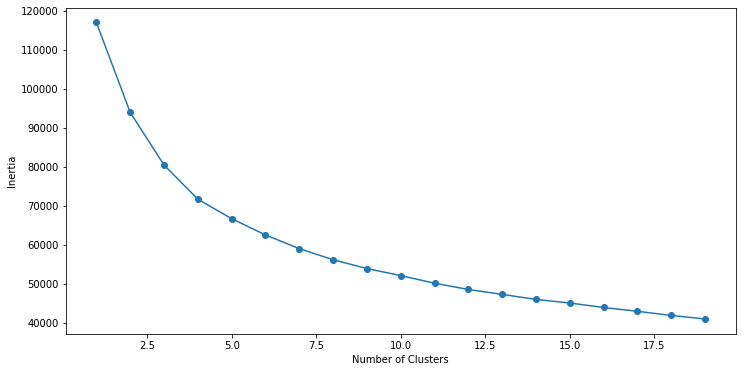

In [ ]:
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_clusters=cluster, init='k-means++')
  kmeans.fit(df_scaled)
  SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
km = KMeans(6)

In [ ]:
km.fit(df_sem_outlier)

KMeans(n_clusters=6)

In [ ]:
df_sem_outlier['cluster'] = km.predict(df_sem_outlier)

In [ ]:
df_sem_outlier['cluster'].value_counts()

0    3278
1    1015
4     870
3     668
2     582
5     467
Name: cluster, dtype: int64

In [ ]:
df1 = df_sem_outlier

In [ ]:
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster']

Plotando as distribuições de cada feature por cluster para análise

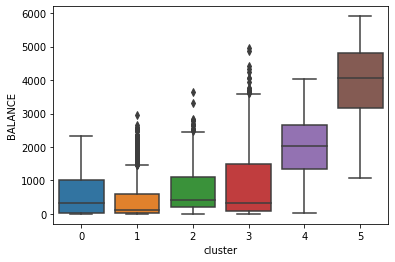

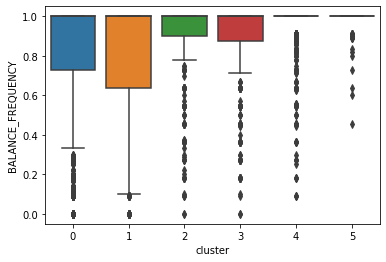

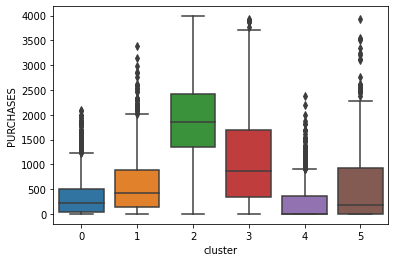

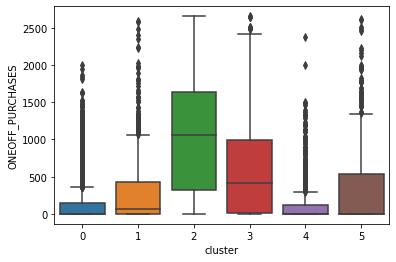

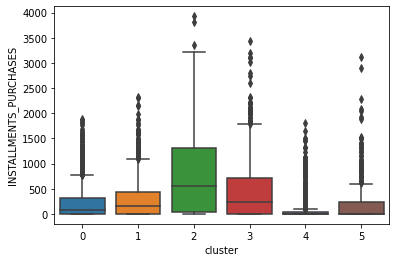

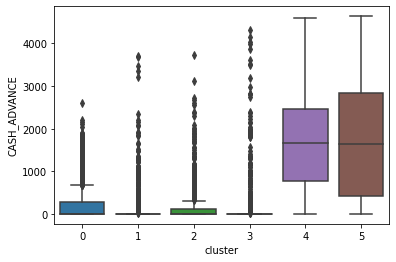

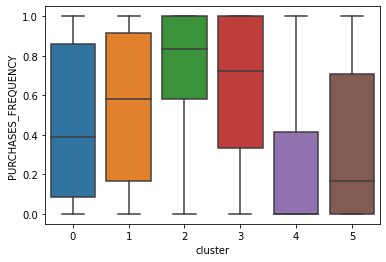

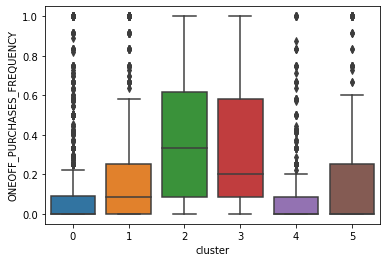

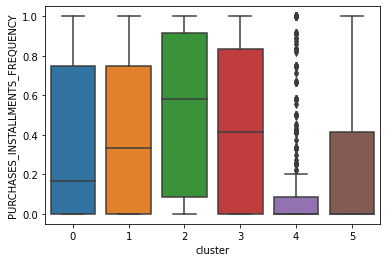

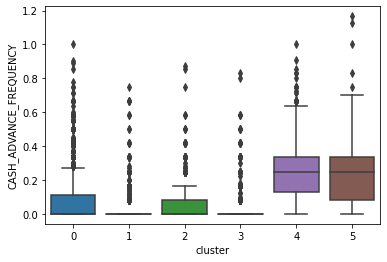

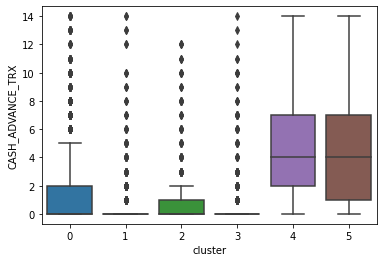

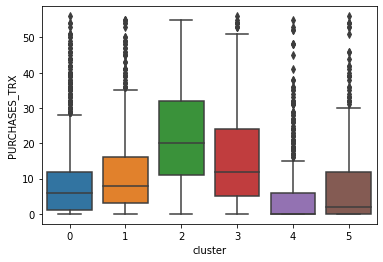

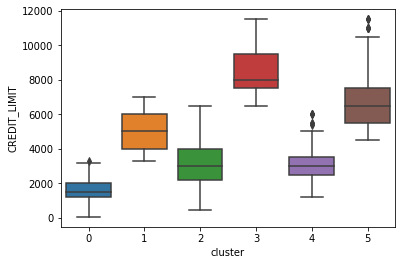

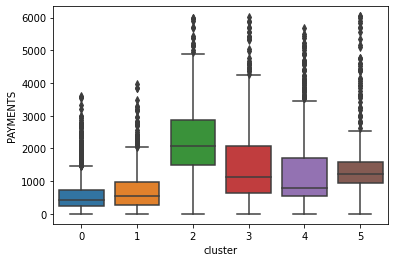

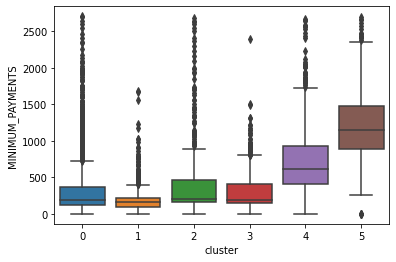

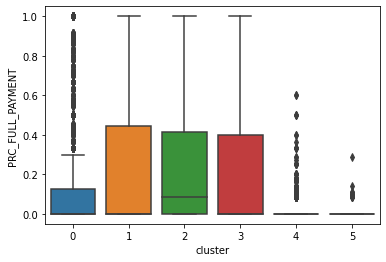

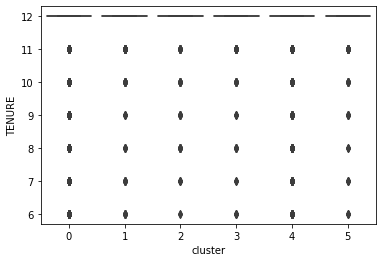

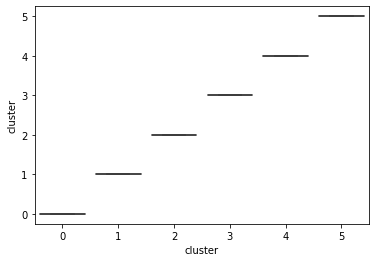

In [ ]:
for cl in features:
  sns.boxplot(x='cluster', y=cl, data=df1)
  plt.show()

In [ ]:
from sklearn.preprocessing import __________ 
from sklearn import metrics 
from sklearn.metrics import silhouette_scorev_measure_score 
from sklearn.cluster import KMeans 
# Normalize 
# Você deve montar o procedimento aqui 
_______________ _______________ _______________ alvo = ___________ 
max = 15 
km_silhouette = [] 
for i in range(2,max):
  km = KMeans(n_clusters=i, random_state=0).fit(alvo) 
  preds = km.predict(alvo) 
  km_scores.append(-km.score(alvo)) 
  silhouette = silhouette_score(alvo,preds) 
  km_silhouette.append(silhouette) 
# Plotagem do método da Silhouette (Silhueta) 
plt.figure(figsize=(7,4)) 
plt.title("Silhouette Method",fontsize=16) 
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k') 
plt.grid(True) 
plt.xlabel("Nº de clusteres",fontsize=14) 
plt.ylabel("Silhouette score",fontsize=15) 
plt.xticks([i for i in range(2,max)],fontsize=14) 
plt.yticks(fontsize=15) 
plt.show()

SyntaxError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


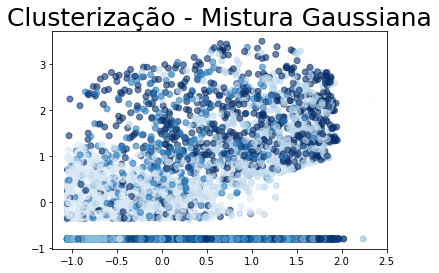

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


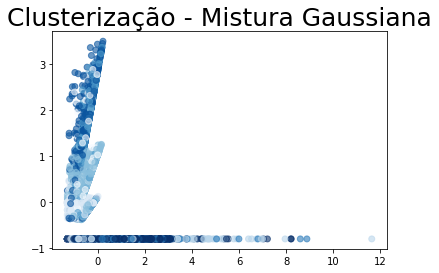

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


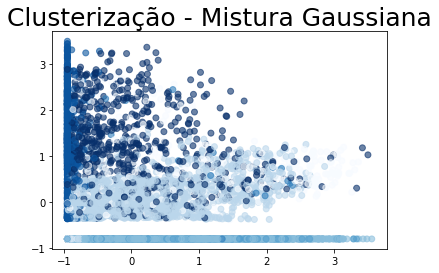

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


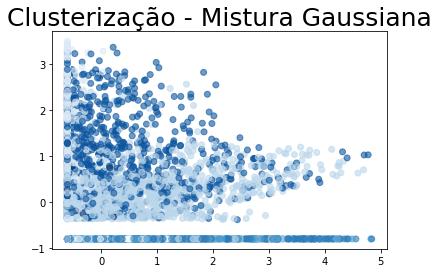

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


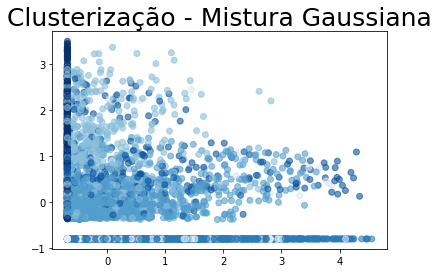

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


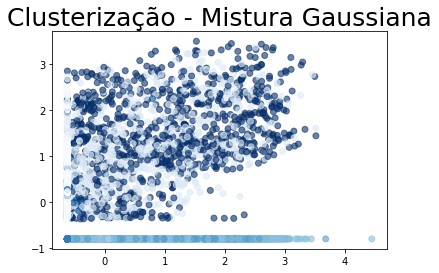

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


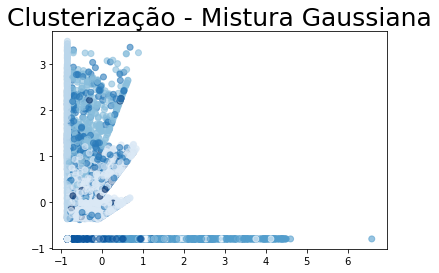

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


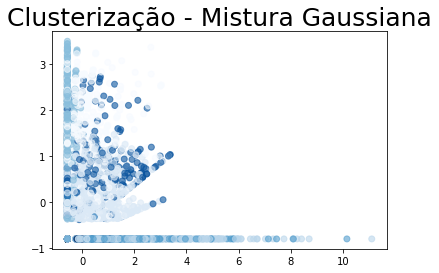

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


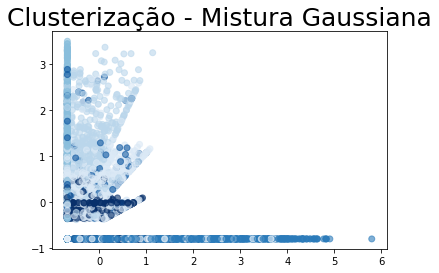

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


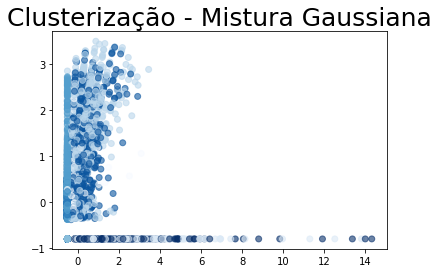

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


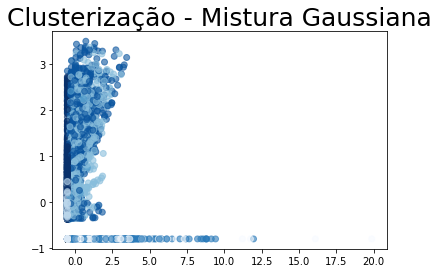

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


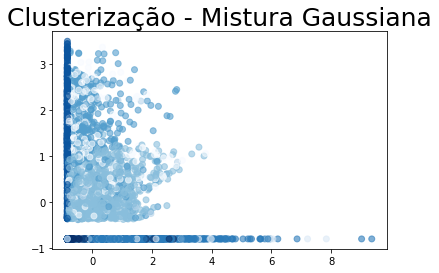

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


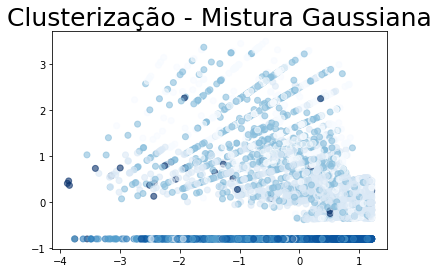

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


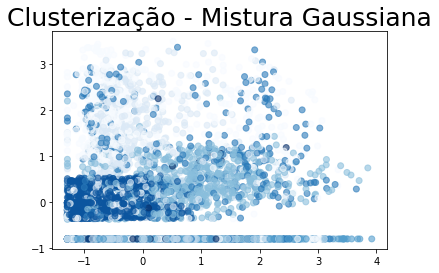

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


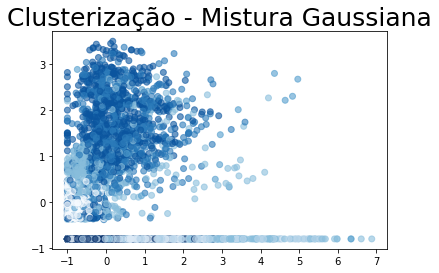

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


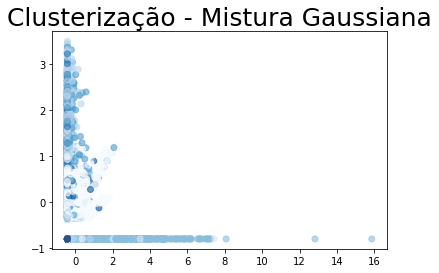

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


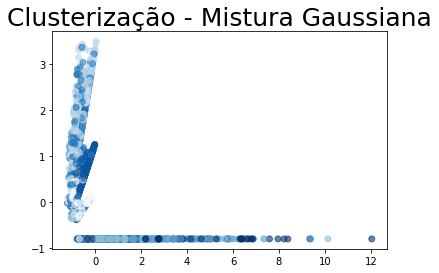

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


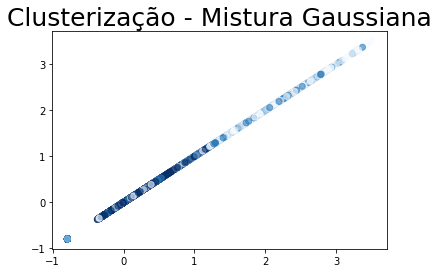

In [ ]:
#Library Import 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import PCA 

# Standardize data 
scaler = StandardScaler() 
scaled_df = df1 

# Normalizing 
normalized_df = normalize(scaled_df, axis=1)
# PCA _____________ 
X_principal = scaler.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = [features]

# Plotagem da clusterização (em 2D)
for col in features:
  plt.title('Clusterização - Mistura Gaussiana',fontsize=25) 
  plt.scatter(X_principal[col], X_principal['cluster'], c = GaussianMixture(n_components = 8).fit_predict(X_principal), alpha = 0.6,cmap='Blues') 
  plt.show()